In [19]:
from ipynb.fs.full.determinator import main
from ipynb.fs.full.determinator import identify_good

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from ipynb.fs.full.determinator import main
import scipy.stats as st

In [21]:
def threshold_stat(data, threshold):
    
    """
    text
    text
    """
    
    data_frame = data.copy()
    data_frame["ADTH0"] = data_frame["AVERAGE_DELAY"]
    data_frame["STDDTH0"] = data_frame["STD_DELAY"]
    data_frame["MDTH0"] = data_frame["MEDIAN_DELAY"]
    
    data_frame = data_frame.drop(["AVERAGE_DELAY", "STD_DELAY", "MEDIAN_DELAY"], axis=1)
    
    data_frame["THRESHOLD"] = threshold
    data_frame["GOOD_BAD"] = data_frame.apply(lambda df: identify_good(df["TOTAL_STATUS"],
                                                                       threshold), axis=1)
        
    noc_frame = data_frame.groupby(by="GOOD_BAD")["ID"].count().reset_index(name="NUMBER_OF_CLIENTS")
    data_frame = pd.merge(data_frame,
                          noc_frame,
                          on="GOOD_BAD",
                          how="left")
    
    number_of_clients = len(data_frame["ID"].drop_duplicates())
    poc_frame = round(100*data_frame.groupby(by="GOOD_BAD")["ID"].count()/number_of_clients, 2).reset_index(name="PERCENTAGE_OF_CLIENTS")
    data_frame = pd.merge(data_frame,
                          poc_frame,
                          on="GOOD_BAD",
                          how="left")
    
    extra_frame = round(data_frame.groupby(by="GOOD_BAD")["DELAY_PAYMENT"].mean(), 2).reset_index(name="AVERAGE_DELAY")
    data_frame = pd.merge(data_frame,
                          extra_frame,
                          on="GOOD_BAD",
                          how="left")
    
    extra_frame = round(data_frame.groupby(by="GOOD_BAD")["DELAY_PAYMENT"].std(), 2).reset_index(name="STD_DELAY")
    data_frame = pd.merge(data_frame,
                          extra_frame,
                          on="GOOD_BAD",
                          how="left")
    
    extra_frame = round(data_frame.groupby(by="GOOD_BAD")["DELAY_PAYMENT"].median(), 2).reset_index(name="MEDIAN_DELAY")
    data_frame = pd.merge(data_frame,
                          extra_frame,
                          on="GOOD_BAD",
                          how="left")
    
    
    return data_frame

In [12]:
credit_record = pd.read_csv("credit_record.csv")

data = main(credit_record, threshold = 0, second_threshold = -0.5)[["ID",
                                                                    "ACTIVITY",
                                                                    "DELAY_PAYMENT",
                                                                    "TOTAL_STATUS",
                                                                    "GOOD",
                                                                    "SUFFICIENT",
                                                                    "AVERAGE_DELAY",
                                                                    "STD_DELAY",
                                                                    "MEDIAN_DELAY"]].drop_duplicates().copy()

In [14]:
data["GOOD_BAD"] = data.apply(lambda df: df["GOOD"] + df["SUFFICIENT"], axis=1)

In [22]:
frame = {"THRESHOLD": [-1.00],
         "GOOD_BAD": [0],
         "TOTAL_STATUS": [0],
         "NUMBER_OF_CLIENTS": [0],
         "PERCENTAGE_OF_CLIENTS": [0],
         "AVERAGE_DELAY": [0],
         "STD_DELAY": [1],
         "MEDIAN_DELAY": [0]}

data_frame = pd.DataFrame(frame)

thresholds = np.linspace(-1, 1, 41)

for threshold in thresholds:
    new_frame = threshold_stat(data, threshold)[["THRESHOLD",
                                                 "GOOD_BAD",
                                                 "TOTAL_STATUS",
                                                 "NUMBER_OF_CLIENTS",
                                                 "PERCENTAGE_OF_CLIENTS",
                                                 "AVERAGE_DELAY",
                                                 "STD_DELAY",
                                                 "MEDIAN_DELAY"]]
    
    data_frame = pd.concat([data_frame, new_frame], ignore_index = True, axis = 0)

In [23]:
data_frame = data_frame.drop_duplicates()
data_frame.head(10)

,THRESHOLD,GOOD_BAD,TOTAL_STATUS,NUMBER_OF_CLIENTS,PERCENTAGE_OF_CLIENTS,AVERAGE_DELAY,STD_DELAY,MEDIAN_DELAY
0,-1.0,0,0.000000,0,0.0,0.00,1.00,0.0
1,-1.0,1,-0.300000,45985,100.0,13.33,12.62,12.0
2,-1.0,1,0.565789,45985,100.0,13.33,12.62,12.0
3,-1.0,1,0.000000,45985,100.0,13.33,12.62,12.0
6,-1.0,1,0.092885,45985,100.0,13.33,12.62,12.0
7,-1.0,1,-0.068333,45985,100.0,13.33,12.62,12.0
8,-1.0,1,1.000000,45985,100.0,13.33,12.62,12.0
9,-1.0,1,-0.600000,45985,100.0,13.33,12.62,12.0
10,-1.0,1,-0.005000,45985,100.0,13.33,12.62,12.0
11,-1.0,1,0.990000,45985,100.0,13.33,12.62,12.0


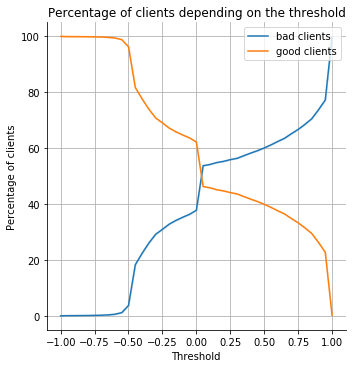

In [24]:
g = sns.relplot(data = data_frame,
                x = "THRESHOLD",
                y = "PERCENTAGE_OF_CLIENTS",
                kind = "line",
                hue = "GOOD_BAD",
                legend = False)

g.set_axis_labels("Threshold", "Percentage of clients")

plt.grid()
plt.title("Percentage of clients depending on the threshold", loc="right")
plt.legend(labels=["bad clients", "good clients"], loc="upper right")

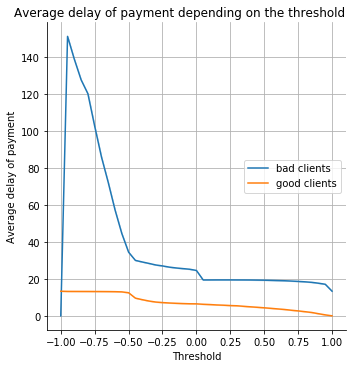

In [25]:
g = sns.relplot(data = data_frame,
                x = "THRESHOLD",
                y = "AVERAGE_DELAY",
                kind = "line",
                hue = "GOOD_BAD",
                legend = False)

g.set_axis_labels("Threshold", "Average delay of payment")

plt.grid()
plt.title("Average delay of payment depending on the threshold", loc="right")
plt.legend(labels=["bad clients", "good clients"], loc="center right")

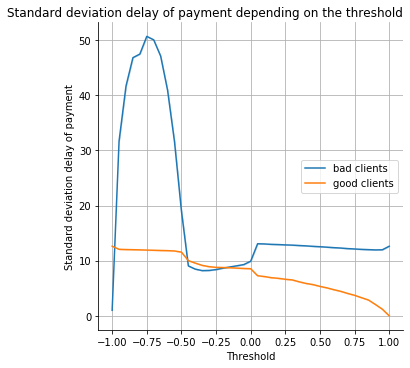

In [26]:
g = sns.relplot(data = data_frame,
                x = "THRESHOLD",
                y = "STD_DELAY",
                kind = "line",
                hue = "GOOD_BAD",
                legend = False)

g.set_axis_labels("Threshold", "Standard deviation delay of payment")

plt.grid()
plt.title("Standard deviation delay of payment depending on the threshold", loc="right")
plt.legend(labels=["bad clients", "good clients"], loc="center right")

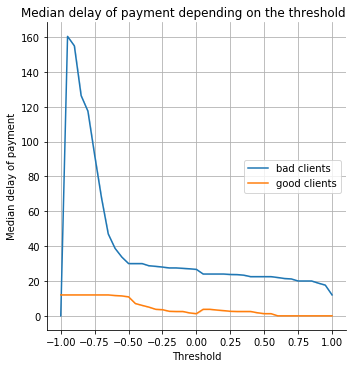

In [27]:
g = sns.relplot(data = data_frame,
                x = "THRESHOLD",
                y = "MEDIAN_DELAY",
                kind = "line",
                hue = "GOOD_BAD",
                legend = False)

g.set_axis_labels("Threshold", "Median delay of payment")

plt.grid()
plt.title("Median delay of payment depending on the threshold", loc="right")
plt.legend(labels=["bad clients", "good clients"], loc="center right")

In [28]:
data_frame["LAG"] = round(data_frame.groupby(by="GOOD_BAD")["NUMBER_OF_CLIENTS"].shift(1))
data_frame["Delta"] = data_frame["NUMBER_OF_CLIENTS"] - data_frame["LAG"]
data_frame["Per_Delta"] = round(100*(data_frame["NUMBER_OF_CLIENTS"] - data_frame["LAG"])/data_frame["LAG"],1)

In [29]:
data_frame[(data_frame["THRESHOLD"] > -0.9) & (data_frame["THRESHOLD"] < 0.01) & (data_frame["GOOD_BAD"] == 0)]

,THRESHOLD,GOOD_BAD,TOTAL_STATUS,NUMBER_OF_CLIENTS,PERCENTAGE_OF_CLIENTS,AVERAGE_DELAY,STD_DELAY,MEDIAN_DELAY,LAG,Delta,Per_Delta
141926,-0.85,0,-0.945685,47,0.10,127.82,46.81,126.43,39.0,8.0,20.5
141930,-0.85,0,-0.916131,47,0.10,127.82,46.81,126.43,47.0,0.0,0.0
143578,-0.85,0,-0.890000,47,0.10,127.82,46.81,126.43,47.0,0.0,0.0
145841,-0.85,0,-1.000000,47,0.10,127.82,46.81,126.43,47.0,0.0,0.0
146197,-0.85,0,-0.979167,47,0.10,127.82,46.81,126.43,47.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
965583,0.00,0,-0.323750,17371,37.78,24.58,9.90,26.67,17371.0,0.0,0.0
965623,0.00,0,-0.084416,17371,37.78,24.58,9.90,26.67,17371.0,0.0,0.0
965647,0.00,0,-0.188333,17371,37.78,24.58,9.90,26.67,17371.0,0.0,0.0
965667,0.00,0,-0.613636,17371,37.78,24.58,9.90,26.67,17371.0,0.0,0.0


In [30]:
data_frame[(data_frame["THRESHOLD"] > -0.6) & (data_frame["THRESHOLD"] < -0.40)]

,THRESHOLD,GOOD_BAD,TOTAL_STATUS,NUMBER_OF_CLIENTS,PERCENTAGE_OF_CLIENTS,AVERAGE_DELAY,STD_DELAY,MEDIAN_DELAY,LAG,Delta,Per_Delta
413866,-0.55,1,-0.300000,45461,98.86,12.97,11.76,11.43,45725.0,-264.0,-0.6
413867,-0.55,1,0.565789,45461,98.86,12.97,11.76,11.43,45461.0,0.0,0.0
413868,-0.55,1,0.000000,45461,98.86,12.97,11.76,11.43,45461.0,0.0,0.0
413871,-0.55,1,0.092885,45461,98.86,12.97,11.76,11.43,45461.0,0.0,0.0
413872,-0.55,1,-0.068333,45461,98.86,12.97,11.76,11.43,45461.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
551758,-0.45,1,-0.084416,37578,81.72,9.59,10.01,7.06,37578.0,0.0,0.0
551782,-0.45,1,-0.188333,37578,81.72,9.59,10.01,7.06,37578.0,0.0,0.0
551786,-0.45,1,0.195906,37578,81.72,9.59,10.01,7.06,37578.0,0.0,0.0
551802,-0.45,0,-0.613636,8407,18.28,30.03,9.05,30.00,8407.0,0.0,0.0


In [33]:
df = main(credit_record, threshold = 0, second_threshold = -0.5)
df["GOOD_BAD"] = df.apply(lambda df: df["GOOD"] + df["SUFFICIENT"], axis=1)

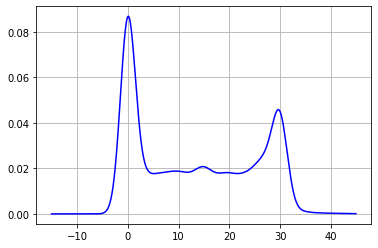

In [34]:
data_frame = df[["ID", "TOTAL_STATUS", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(data_frame)
m = st.tmean(np.array(data_frame["DELAY_PAYMENT"]))
s = st.tstd(np.array(data_frame["DELAY_PAYMENT"]))

delayX = data_frame["DELAY_PAYMENT"].values
kde_estimator1 = st.gaussian_kde(delayX)

t = np.arange(-15,45,0.1)
plt.plot(t,kde_estimator1(t),"blue")
plt.grid()

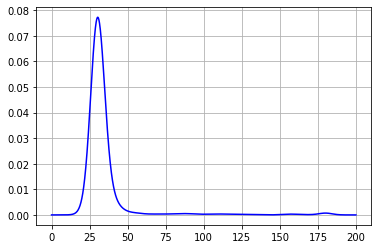

In [35]:
data_frame = df[["ID", "TOTAL_STATUS", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(data_frame[data_frame["TOTAL_STATUS"] < -0.5])
m = st.tmean(np.array(data_frame[data_frame["TOTAL_STATUS"] < -0.5]["DELAY_PAYMENT"]))
s = st.tstd(np.array(data_frame[data_frame["TOTAL_STATUS"] < -0.5]["DELAY_PAYMENT"]))

delayX = data_frame[data_frame["TOTAL_STATUS"] < -0.5]["DELAY_PAYMENT"].values
kde_estimator1 = st.gaussian_kde(delayX)

t = np.arange(0,200,0.1)
plt.plot(t,kde_estimator1(t),"blue")
plt.grid()

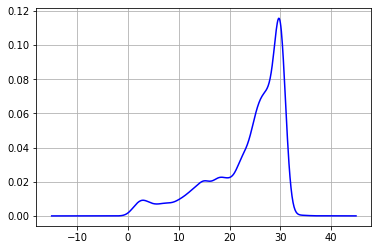

In [36]:
data_frame = df[["ID", "TOTAL_STATUS", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(data_frame[(data_frame["TOTAL_STATUS"] >= -0.5) & (data_frame["TOTAL_STATUS"] < 0)])
m = st.tmean(np.array(data_frame[(data_frame["TOTAL_STATUS"] >= -0.5) & (data_frame["TOTAL_STATUS"] < 0)]["DELAY_PAYMENT"]))
s = st.tstd(np.array(data_frame[(data_frame["TOTAL_STATUS"] >= -0.5) & (data_frame["TOTAL_STATUS"] < 0)]["DELAY_PAYMENT"]))

delayX = data_frame[(data_frame["TOTAL_STATUS"] >= -0.5) & (data_frame["TOTAL_STATUS"] < 0)]["DELAY_PAYMENT"].values
kde_estimator1 = st.gaussian_kde(delayX)

t = np.arange(-15,45,0.1)
plt.plot(t,kde_estimator1(t),"blue")
plt.grid()

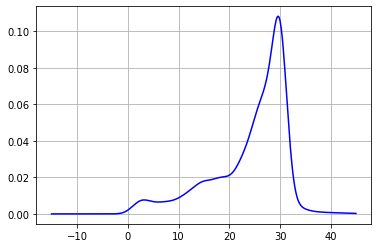

In [37]:
data_frame = df[["ID", "TOTAL_STATUS", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(data_frame[data_frame["TOTAL_STATUS"] > 0])
m = st.tmean(np.array(data_frame[data_frame["TOTAL_STATUS"] > 0]["DELAY_PAYMENT"]))
s = st.tstd(np.array(data_frame[data_frame["TOTAL_STATUS"] > 0]["DELAY_PAYMENT"]))

delayX = data_frame[data_frame["TOTAL_STATUS"] < 0]["DELAY_PAYMENT"].values
kde_estimator1 = st.gaussian_kde(delayX)

t = np.arange(-15,45,0.1)
plt.plot(t,kde_estimator1(t),"blue")
plt.grid()

45985 13.33 12.62 Threshold: -0.5, przedział ufności: [13.21 13.44]
całka na przedziale (0,30) wynosi 0.76


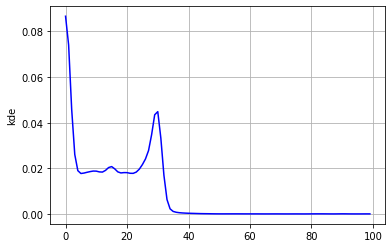

In [38]:
df2 = df[["ID", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(df2)
m = st.tmean(np.array(df2["DELAY_PAYMENT"]))
s = st.tstd(np.array(df2["DELAY_PAYMENT"]))

a = 0.05

ua = st.norm().ppf(1-a/2)
CIm = np.array([round(m - ua*s/np.sqrt(N),2), round(m + ua*s/np.sqrt(N),2)])

print(N, round(m,2), round(s,2), "Threshold: {}, przedział ufności: {}".format(round(-0.5,2), CIm))

delayX = df2["DELAY_PAYMENT"].values
kde_estimator = st.gaussian_kde(delayX)

a = 0
b = 30
p = round(kde_estimator.integrate_box_1d(a,b), 2)
print("całka na przedziale ({},{}) wynosi {}".format(a,b,p))

t = np.arange(0,100,1)
tf = np.arange(a,b,1)

#plt.fill_between(tf,0,kde_estimator(tf))
plt.plot(t,kde_estimator(t),"blue")
#plt.xlabel("Delay payment - good clients")
plt.ylabel("kde")
plt.grid()

44274 12.51 11.55 Threshold: -0.5, przedział ufności: [12.4  12.62]
całka na przedziale (0,15) wynosi 0.42


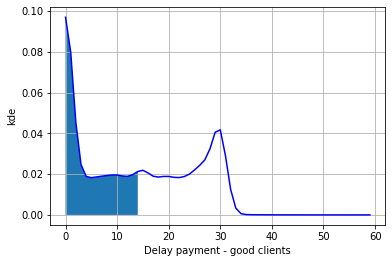

In [39]:
df2 = df[["ID", "GOOD_BAD", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(df2[df2["GOOD_BAD"] == 1])
m = st.tmean(np.array(df2[df2["GOOD_BAD"] == 1]["DELAY_PAYMENT"]))
s = st.tstd(np.array(df2[df2["GOOD_BAD"] == 1]["DELAY_PAYMENT"]))

a = 0.05

ua = st.norm().ppf(1-a/2)
CIm = np.array([round(m - ua*s/np.sqrt(N),2), round(m + ua*s/np.sqrt(N),2)])

print(N, round(m,2), round(s,2), "Threshold: {}, przedział ufności: {}".format(round(-0.5,2), CIm))

delayX = df2[df2["GOOD_BAD"] == 1]["DELAY_PAYMENT"].values
kde_estimator1 = st.gaussian_kde(delayX)

a = 0
b = 15
p = round(kde_estimator1.integrate_box_1d(a,b), 2)
print("całka na przedziale ({},{}) wynosi {}".format(a,b,p))

t = np.arange(0,60,1)
tf = np.arange(a,b,1)

plt.fill_between(tf,0,kde_estimator1(tf))
plt.plot(t,kde_estimator1(t),"blue")
plt.xlabel("Delay payment - good clients")
plt.ylabel("kde")
plt.grid()

1711 34.48 19.03 Threshold: -0.5, przedział ufności: [33.58 35.38]
całka na przedziale (0,180) wynosi 1.0


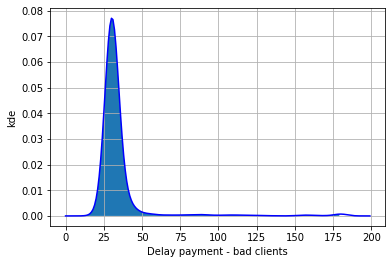

In [40]:
df2 = df[["ID", "GOOD_BAD", "DELAY_PAYMENT"]].drop_duplicates().copy()

N = len(df2[df2["GOOD_BAD"] == 0])
m = st.tmean(np.array(df2[df2["GOOD_BAD"] == 0]["DELAY_PAYMENT"]))
s = st.tstd(np.array(df2[df2["GOOD_BAD"] == 0]["DELAY_PAYMENT"]))

a = 0.05

ua = st.norm().ppf(1-a/2)
CIm = np.array([round(m - ua*s/np.sqrt(N),2), round(m + ua*s/np.sqrt(N),2)])

print(N, round(m,2), round(s,2), "Threshold: {}, przedział ufności: {}".format(round(-0.5,2), CIm))

delayX = df2[df2["GOOD_BAD"] == 0]["DELAY_PAYMENT"].values
kde_estimator0 = st.gaussian_kde(delayX)

a = 0
b = 180
p = round(kde_estimator0.integrate_box_1d(a,b), 2)
print("całka na przedziale ({},{}) wynosi {}".format(a,b,p))

t = np.arange(0,200,1)
tf = np.arange(a,b,1)

plt.fill_between(tf,0,kde_estimator0(tf))
plt.plot(t,kde_estimator0(t),"blue")
plt.xlabel("Delay payment - bad clients")
plt.ylabel("kde")
plt.grid()

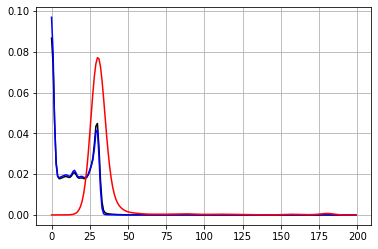

In [41]:
t = np.arange(0,200,1)

plt.plot(t,kde_estimator(t),"black", t,kde_estimator1(t),"blue", t,kde_estimator0(t),"red")
plt.grid()